# Esercizio 1

Simuliamo N lanci di una moneta equilibrata, ovvero con $p = 0.5$.
Per fare questo generiamo $N$ numeri random uniformi in $[0, 1]$ e poniamo testa ogni volta che il numero è minore di 0.5 e croce altrimenti. 
Si chiede di farlo per tre diversi $N$. Generiamo un vettore di prova che abbia lo stesso numero di elementi del più grande. Per i primi due casi considereremo soltanto i primi elementi.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [25]:
#Genero il lancio della moneta
n = [100, 1000, 10000] #numero di prove
p = 0.5 #probabilità

prove = np.random.rand(n[2]) #vettori di numeri random tra 0 e 1

testa = np.where(prove < p, 1, 0) #metto 1 quando p < 0.5 e 0 quando p > 0.5

F0 = np.unique(testa[:n[0]], return_counts=True) #conto quanti uni e zero sono usciti nei primi 100 lanci
F1 = np.unique(testa[:n[1]], return_counts=True) #conto quanti uni e zero sono usciti nei primi 1000 lanci
F2 = np.unique(testa[:n[2]], return_counts=True) #conto quanti uni e zero sono usciti in tutti i lanci

print(F)


(array([0, 1]), array([59, 41]))


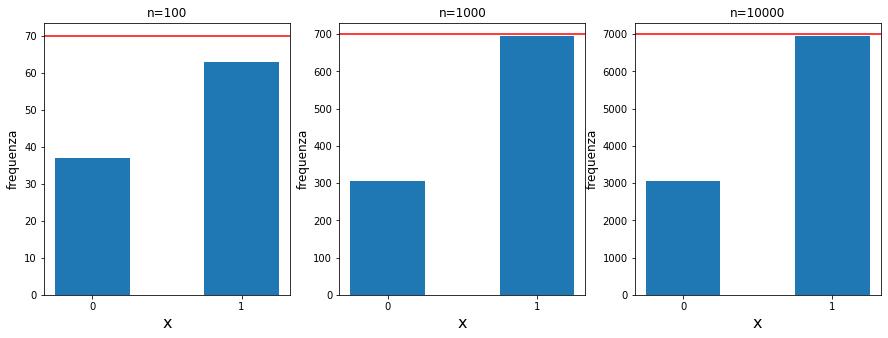

In [42]:
#Faccio l'istogramma e confronto con il risultato teorico
#Il risultato teorico è aspettarmi una media di np successi
#ovvero la barra corrispondente al valore uno tenderà a np

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax[0].set_xticks([0, 1])
ax[0].set_title("n=100")
ax[0].set_xlabel('x', fontsize=16)
ax[0].set_ylabel('frequenza', fontsize=12)
ax[0].bar(F0[0], F0[1], width=0.5, align='center')
ax[0].axhline(y=n[0]*p, xmin=0, xmax=1, color='r')

ax[1].set_xticks([0, 1])
ax[1].set_title("n=1000")
ax[1].set_xlabel('x', fontsize=16)
ax[1].set_ylabel('frequenza', fontsize=12)
ax[1].bar(F1[0], F1[1], width=0.5, align='center')
ax[1].axhline(y=n[1]*p, xmin=0, xmax=1, color='r')

ax[2].set_xticks([0, 1])
ax[2].set_title("n=10000")
ax[2].set_xlabel('x', fontsize=16)
ax[2].set_ylabel('frequenza', fontsize=12)
ax[2].bar(F2[0], F2[1], width=0.5, align='center')
ax[2].axhline(y=n[2]*p, xmin=0, xmax=1, color='r')

plt.show()


In [38]:
#ripetiamo tutto per p = 0.7
n = [100, 1000, 10000] #numero di prove
p = 0.7 #probabilità

prove = np.random.rand(n[2]) #vettori di numeri random tra 0 e 1

testa = np.where(prove < p, 1, 0) #metto 1 quando p < 0.5 e 0 quando p > 0.5

F0 = np.unique(testa[:n[0]], return_counts=True) #conto quanti uni e zero sono usciti nei primi 100 lanci
F1 = np.unique(testa[:n[1]], return_counts=True) #conto quanti uni e zero sono usciti nei primi 1000 lanci
F2 = np.unique(testa[:n[2]], return_counts=True) #conto quanti uni e zero sono usciti in tutti i lanci

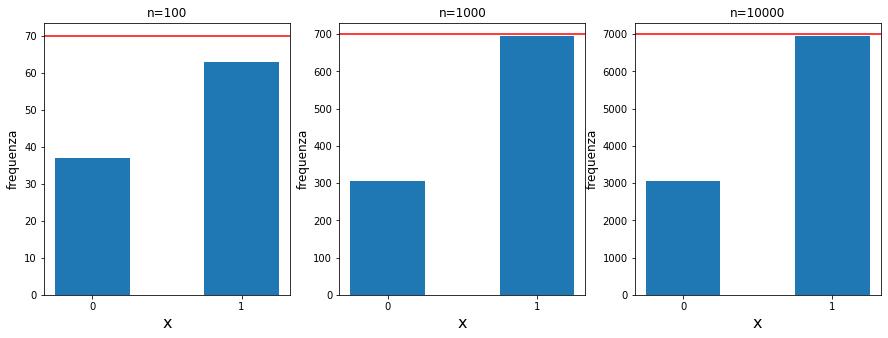

In [43]:
#Faccio l'istogramma e confronto con il risultato teorico
#Il risultato teorico è aspettarmi una media di np successi
#ovvero la barra corrispondente al valore uno tenderà a np

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax[0].set_xticks([0, 1])
ax[0].set_title("n=100")
ax[0].set_xlabel('x', fontsize=16)
ax[0].set_ylabel('frequenza', fontsize=12)
ax[0].bar(F0[0], F0[1], width=0.5, align='center')
ax[0].axhline(y=n[0]*p, xmin=0, xmax=1, color='r')

ax[1].set_xticks([0, 1])
ax[1].set_title("n=1000")
ax[1].set_xlabel('x', fontsize=16)
ax[1].set_ylabel('frequenza', fontsize=12)
ax[1].bar(F1[0], F1[1], width=0.5, align='center')
ax[1].axhline(y=n[1]*p, xmin=0, xmax=1, color='r')

ax[2].set_xticks([0, 1])
ax[2].set_title("n=10000")
ax[2].set_xlabel('x', fontsize=16)
ax[2].set_ylabel('frequenza', fontsize=12)
ax[2].bar(F2[0], F2[1], width=0.5, align='center')
ax[2].axhline(y=n[2]*p, xmin=0, xmax=1, color='r')

plt.show()

Commentare il risultato ottenuto. 
I primi commenti che si possono fare sono abbastanza banali, ovvero che sbilanciando la moneta aumenta la probabilità di vincita, ovvero il numero di volte che otteniamo 1, che, per la nostra codifica, significa il numero di volte che abbiamo ottenuto croce. 
Osserviamo inoltre che al crescere del numero di lanci il risultato si avvicina sempre di più a quello predetto dalla teoria, confermando la legge dei grandi numeri. 

# Esercizio 2

Dobbiamo calcolare l'integrale definito di una Gaussiana tra $a = -3$ e $b = 3$ utilizzando il metodo hit or miss. Ricordiamo che il metodo hit or miss è un metodo Monte Carlo che permette di calcolare numericamente integrali definiti. 
Per prima cosa disegniamo un rettangolo attorno alla funzione di base $b-a$ e di altezza il massimo $M$ assunto dalla funzione. In questo caso, trattandosi di una funzione normale standard, il massimo si ottiene in $x = 0$ ed è $\frac{1}{\sqrt{2\pi}}$.
Genero una coppia di numeri all'interno di questo rettangolo, allora la probabilità che questa coppia stia sotto la funzione è data dal rapporto tra l'area che voglio calcolare e l'area del rettangolo, ovvero $p =\frac{I}{(b-a)M}$. 
Posso stimare in maniera empirica la probabilità generando $N$ (molto grande) coppie di numeri e contando il numero $N_s$ di volte in cui queste stiano sotto la funzione.
In tal caso avrò che $p = \frac{N_s}{N}$ e quindi stimerò l'integrale come $I = \frac{N_s}{N}(b-a)M$.
In questo caso posso anche confrontare il risultato con il valore teorico dato da $I = \Phi(3) - \Phi(-3)$, dove $\Phi$ indica la funzione di ripartizione della normale standard.


In [46]:
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt

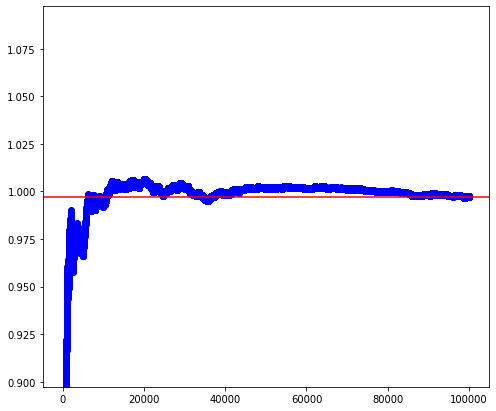

In [50]:
#Per comodità definiamoci la funzione che dobbiamo integrare
def gauss(x):
    return np.exp(-0.5*(x**2))/np.sqrt(2*np.pi) 

a = -3
b = 3
M = 1/np.sqrt(2*np.pi)

nmin = 100 #numero minimo di campioni generati
nmax = 100000 #numero massimo di campioni generati
n = nmax-nmin #numero di stime dell'integrale generate 
nrange = np.arange(nmin, nmax, 1)
nsize = np.size(nrange)

x1 = np.random.rand(n) 
csi = a + (b-a)*x1 #genero primo numero random della coppia, uniforme in [a, b]
x2 = np.random.rand(n)
eta = M*x2 #secondo numero random della coppia, uniforme in [0, M]

y = np.where(eta <= gauss(csi), 1, 0) #verifico se la coppia generata sta nell'area che mi interessa

Ns = np.cumsum(y) #calcolo la somma cumulata per stimare ad ogni n l'integrale
I = M*Ns*(b-a)/nrange #stimo l'integrale
I_teoria = norm.cdf(b)-norm.cdf(a)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))
ax.plot(nrange, I, 'bo')
ax.axhline(I_teoria, color='r')
ax.set_ylim([I_teoria - 0.1, I_teoria + 0.1])
plt.show()

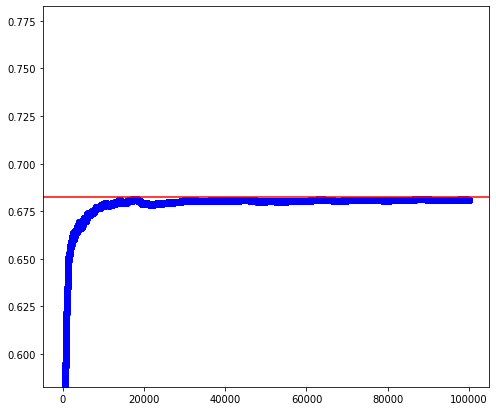

In [51]:
#Ripetiamo tutto cambiando gli estremi
a = -1
b = 1
x1 = np.random.rand(n) 
csi = a + (b-a)*x1 #genero primo numero random della coppia, uniforme in [a, b]
x2 = np.random.rand(n)
eta = M*x2 #secondo numero random della coppia, uniforme in [0, M]

y = np.where(eta <= gauss(csi), 1, 0) #verifico se la coppia generata sta nell'area che mi interessa

Ns = np.cumsum(y) #calcolo la somma cumulata per stimare ad ogni n l'integrale
I = M*Ns*(b-a)/nrange #stimo l'integrale
I_teoria = norm.cdf(b)-norm.cdf(a)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))
ax.plot(nrange, I, 'bo')
ax.axhline(I_teoria, color='r')
ax.set_ylim([I_teoria - 0.1, I_teoria + 0.1])
plt.show()

Commentiamo il risultato. Per prima cosa osserviamo che la convergenza del Monte Carlo non è particolarmente veloce, infatti dobbiamo generare ben più di 10000 punti prima di avvicinarci sensibilmente al risultato teorico. 
Inoltre notiamo che nel secondo caso la convergenza è, in media, più rapida rispetto al primo caso. Questo è dovuto al fatto che quando consideriamo come estremi $a = -1$ e $b = 1$ la Gaussiana "riempie" di più il quadrato, diminuendo il numero di rigetti. Allargando gli estremi di integrazione il profilo della Gaussiana si allarga e la zona di rigetto inizia a diventare importante, richiedendo un maggior numero di punti generati. 